## Working with Xarray
Xarry is a class of objects added to the regular python system that allows storing data in a more organized method. The format is very similar to netCDF classic model (netCDF3). It can read netCDF files efficiently and handle some issues associated with incorrectly designed netCDF files.

Xarray also has extetions to use the Numpy, Pandas, Dask and SciPy libaries directly. Think of Xarray as a tool for orgnaizing data in a way that other libaries can be used on the data efficiently.

The primary difference between Xarray and Pandas is that Pandas is designed to handle 1-D data while Xarray can handle n-D data and metadata about the data.

The one downside is that Xarry has very powerful functions with less great documentation. May need to dig a bit to get the best way to perform a task.

In [1]:
import numpy as np
import xarray as xr  # Convention is to import xarray as xr

## DataArray
Here we create some data with Numpy and put into an Xarray DataArray. Notice how there is a concept of dimentionality built into DataArray. "xarray.DataArray  (dim_0: 10000)". But because we didn't define the dimention name a generic one was created for us.

In [3]:
data = np.arange(10000)  # This is a numpy array
xr_da = xr.DataArray(data)  # Create the Xarray DataArray using Numpy array.
xr_da

<xarray.DataArray (dim_0: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Dimensions without coordinates: dim_0

This time create a time array to match the data array shape. Time will be one minute time steps. The time array will become a coordinate variable to describe the values along the dimention we defined and named "time". The coordinate is set to the time array and the dimention is set to "time" string.

In [7]:
time = np.array('2019-11-01T00:00:00', dtype='datetime64[m]') + np.arange(data.size)
xr_da = xr.DataArray(data, dims=['time'], coords=[time])
xr_da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00

We can add attributes describing metadata about the data.

In [8]:
xr_da.attrs['long_name'] = 'Amazing data that will win me a Nobel prize.'
xr_da.attrs['units'] = 'degK'
xr_da.attrs['valid_min'] = 0.
xr_da.attrs['valid_max'] = 10000.
xr_da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Amazing data that will win me a Nobel prize.
    units:      degK
    valid_min:  0.0
    valid_max:  10000.0

Same as above but all in one step while creating the DataArray.

In [10]:
xr_da = xr.DataArray(
    data, dims=['time'],
    coords=[time],
    attrs={'long_name': 'Amazing data that will win me a Nobel prize.',
           'units': 'degK',
           'valid_min': 0.,
           'valid_max': 10000.})
xr_da

<xarray.DataArray (time: 10000)>
array([   0,    1,    2, ..., 9997, 9998, 9999])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Amazing data that will win me a Nobel prize.
    units:      degK
    valid_min:  0.0
    valid_max:  10000.0

To extract the data values only we use the .values attribute on the DataArray

In [12]:
xr_da.values

array([   0,    1,    2, ..., 9997, 9998, 9999])

To extract the attributes as a dictionary we use the .attrs attribute.

In [13]:
xr_da.attrs

{'long_name': 'Amazing data that will win me a Nobel prize.',
 'units': 'degK',
 'valid_min': 0.0,
 'valid_max': 10000.0}

Or the attrs decorator can also accept a name for a specific attribute

In [14]:
xr_da.attrs['long_name']

'Amazing data that will win me a Nobel prize.'

In [15]:
type(xr_da)

xarray.core.dataarray.DataArray

In [16]:
type(xr_da.values)

numpy.ndarray

In [17]:
type(xr_da.attrs)

dict

## Dataset
The full power of Xarray comes from using Datasets. A Dataset is a collection of DataArrays. The beauty of Datasets is holding all the corresoponding data together and performing functions on multiple DataArrays in the Datasets all at once. This becomes very powerful and very fast!

Create some data and a time data array to match the data we created with minute time steps.

In [18]:
data1 = np.arange(10000, dtype=float)
data2 = np.arange(10000, dtype=float) + 123.456
time = np.array('2019-11-01T00:00:00', dtype='datetime64[m]') + np.arange(data1.size)

In [19]:
xr_ds = xr.Dataset(
    # This is the data section.
    # Notice all data is wrappted in a dictionary. In that dictionary the key
    # is the variable name followed by a tuple. The first value of the tuple
    # is the dimension(s) name, folloed by the data values, followed by optional
    # dictionary of attributes as key:value pairs.
    data_vars={'data1': ('time', data1, {'long_name': 'Data 1 values', 'units': 'degC'}),
               'data2': ('time', data2, {'long_name': 'Data 2 values', 'units': 'degF'})
               },
    # This is the coordinate section following the same format. Since this
    # comes next it could be interpredted as positional as coordinates.
    # But we are using keywords to make it easier to understand.
    coords={'time': ('time', time, {'long_name': 'Time in UTC'})},
    # Lastly we have the global attributes.
    attrs={'the_best_animals': 'sharks'}
)

Print out the full Dataset

In [21]:
xr_ds

<xarray.Dataset>
Dimensions:  (time: 10000)
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Data variables:
    data1    (time) float64 0.0 1.0 2.0 3.0 ... 9.997e+03 9.998e+03 9.999e+03
    data2    (time) float64 123.5 124.5 125.5 ... 1.012e+04 1.012e+04 1.012e+04
Attributes:
    the_best_animals:  sharks

Print out one DataArray from the Dataset

In [23]:
xr_ds['data1']

<xarray.DataArray 'data1' (time: 10000)>
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])
Coordinates:
  * time     (time) datetime64[ns] 2019-11-01 ... 2019-11-07T22:39:00
Attributes:
    long_name:  Data 1 values
    units:      degC

Print out values from the one variable in the Dataset

In [24]:
xr_ds['data1'].values

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 9.997e+03, 9.998e+03,
       9.999e+03])

Print out one attribute from one DataArray

In [25]:
xr_ds['data1'].attrs['units']

'degC'

## Read in data
Let's read in a single netCDF data file.

In [26]:
from pathlib import Path
filename = Path('data', 'sgpmetE13.b1', 'sgpmetE13.b1.20191101.000000.cdf')
met_ds = xr.open_dataset(filename)
met_ds

<xarray.Dataset>
Dimensions:                       (time: 1440)
Coordinates:
  * time                          (time) datetime64[ns] 2019-11-01 ... 2019-1...
Data variables: (12/50)
    base_time                     datetime64[ns] ...
    time_offset                   (time) datetime64[ns] ...
    atmos_pressure                (time) float32 ...
    qc_atmos_pressure             (time) int32 ...
    temp_mean                     (time) float32 ...
    qc_temp_mean                  (time) int32 ...
    ...                            ...
    qc_logger_volt                (time) int32 ...
    logger_temp                   (time) float32 ...
    qc_logger_temp                (time) int32 ...
    lat                           float32 ...
    lon                           float32 ...
    alt                           float32 ...
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...

We can also read in multiple netCDF data files using a differnet method. All the kewords accecpted by open_dataset() are accepted by open_mfdataset().

The filename glob is understood by open_mfdataset() and correctly grabs all the files that match the file glob. Using parallel=True allows it to use multiple cores for reading the data. This may depend on your machine and number of cores available, and may be faster or may not. We can also reduce the amount of memory required by excluding some variables from being read.

In [27]:
filename = str(Path('data', 'sgpmetE13.b1', 'sgpmetE13.b1.*.cdf'))

To resolve issues with incorrectly formatted variables or reduce the memory we can exclude some variable from being read.

In [29]:
drop_vars = [
    'base_time', 'time_offset', 'vapor_pressure_std', 'wspd_arith_mean',
    'qc_wspd_arith_mean', 'wspd_vec_mean', 'qc_wspd_vec_mean',
    'wdir_vec_mean', 'qc_wdir_vec_mean', 'wdir_vec_std', 'tbrg_precip_total',
    'qc_tbrg_precip_total', 'tbrg_precip_total_corr', 'qc_tbrg_precip_total_corr',
    'org_precip_rate_mean', 'qc_org_precip_rate_mean', 'pwd_err_code',
    'pwd_mean_vis_1min', 'qc_pwd_mean_vis_1min', 'pwd_mean_vis_10min',
    'qc_pwd_mean_vis_10min', 'pwd_pw_code_inst', 'qc_pwd_pw_code_inst',
    'pwd_pw_code_15min', 'qc_pwd_pw_code_15min', 'pwd_pw_code_1hr',
    'qc_pwd_pw_code_1hr', 'pwd_precip_rate_mean_1min',
    'qc_pwd_precip_rate_mean_1min', 'pwd_cumul_rain', 'qc_pwd_cumul_rain',
    'pwd_cumul_snow', 'qc_pwd_cumul_snow', 'logger_volt', 'qc_logger_volt',
    'logger_temp', 'qc_logger_temp', 'temp_std', 'rh_std', 'vapor_pressure_mean',
    'qc_vapor_pressure_mean', 'a_very_long_name_that_is_not_in_the_data_file']


met_ds = xr.open_mfdataset(filename, drop_variables=drop_vars,
                           parallel=True)

met_ds

<xarray.Dataset>
Dimensions:            (time: 5460)
Coordinates:
  * time               (time) datetime64[ns] 2019-11-01 ... 2019-11-04T18:59:00
Data variables:
    atmos_pressure     (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_atmos_pressure  (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    temp_mean          (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_temp_mean       (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    rh_mean            (time) float32 dask.array<chunksize=(1440,), meta=np.ndarray>
    qc_rh_mean         (time) int32 dask.array<chunksize=(1440,), meta=np.ndarray>
    lat                (time) float32 36.6 36.6 36.6 36.6 ... 36.6 36.6 36.6
    lon                (time) float32 -97.49 -97.49 -97.49 ... -97.49 -97.49
    alt                (time) float32 318.0 318.0 318.0 ... 318.0 318.0 318.0
Attributes: (12/29)
    command_line:                met_ingest -s sgp -f E13
    process_version:             ingest-met-4.40-0.el7
    dod_version:                 met-b1-7.3
    input_source:                /data/collection/sgp/sgpmetE13.00/MET_Table1...
    site_id:                     sgp
    platform_id:                 met
    ...                          ...
    qc_bit_2_assessment:         Bad
    qc_bit_3_description:        Value is greater than the valid_max.
    qc_bit_3_assessment:         Bad
    qc_bit_4_description:        Difference between current and previous valu...
    qc_bit_4_assessment:         Indeterminate
    history:                     created by user dsmgr on machine garnet at 2...

Once we have the data read, Xarray has a wrapper around matplotlib to generate plots directly from the Dataset.

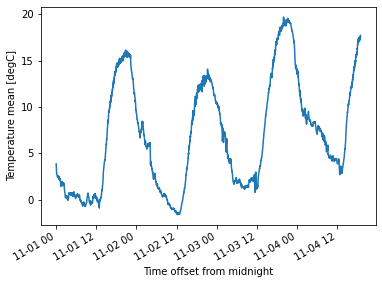

In [31]:
%matplotlib inline

met_ds['temp_mean'].plot()

Here we make two plots. Syntax is slightly different than calling matplotlib directly.

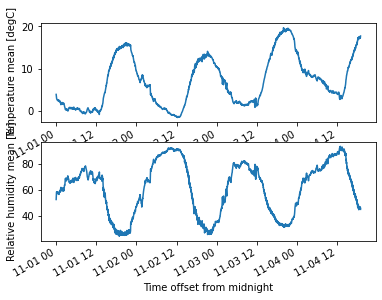

In [32]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2)
met_ds['temp_mean'].plot(ax=axes[0])
met_ds['rh_mean'].plot(ax=axes[1])

## Xarray playing very well with other libraries
We can use Xarray with Pandas natively for even easier actions.
Here we use pandas to make a time array with a 6 hour time step for four years.

In [33]:
import pandas as pd

pd_time = pd.date_range('2000-01-01', freq='6H', periods=365 * 4)
pd_time

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 06:00:00',
               '2000-01-01 12:00:00', '2000-01-01 18:00:00',
               '2000-01-02 00:00:00', '2000-01-02 06:00:00',
               '2000-01-02 12:00:00', '2000-01-02 18:00:00',
               '2000-01-03 00:00:00', '2000-01-03 06:00:00',
               ...
               '2000-12-28 12:00:00', '2000-12-28 18:00:00',
               '2000-12-29 00:00:00', '2000-12-29 06:00:00',
               '2000-12-29 12:00:00', '2000-12-29 18:00:00',
               '2000-12-30 00:00:00', '2000-12-30 06:00:00',
               '2000-12-30 12:00:00', '2000-12-30 18:00:00'],
              dtype='datetime64[ns]', length=1460, freq='6H')

We will create a new Xarray Dataset with a range of numbers matching the number of time samples we created. The Pandas time is used to initialize the xarray Dataset. Because Pandas and Xarray play well together it just works.

In [35]:
xr_ds = xr.Dataset({'data': ('time', np.arange(len(pd_time))), 'time': pd_time})
xr_ds

<xarray.Dataset>
Dimensions:  (time: 1460)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T18:00:00
Data variables:
    data     (time) int64 0 1 2 3 4 5 6 7 ... 1453 1454 1455 1456 1457 1458 1459

## Sub-selecting data
Now let's calculate the mean for a day by grouping the data. This works for all time worded groups: hour, minute, year, month, ... The method returns a new Dataset and leaves the orginal untouched. Notice how _data_ was orginanally type integer, but because we are calcualting a mean, the type is upconverted to float.

In [37]:
ds_mean = xr_ds.groupby('time.day').mean()
ds_mean

<xarray.Dataset>
Dimensions:  (day: 31)
Coordinates:
  * day      (day) int64 1 2 3 4 5 6 7 8 9 10 ... 22 23 24 25 26 27 28 29 30 31
Data variables:
    data     (day) float64 670.8 674.8 678.8 682.8 ... 778.8 782.8 836.4 688.2

We can also define the grouping size by using the .resample() method and pass in the funciton to use using the .reduce() method. If there is no data to perform the operation, a new time step is added with a NaN data value.

In [39]:
ds_mean = xr_ds.resample(time='30min').reduce(np.nanmean)
ds_mean

<xarray.Dataset>
Dimensions:  (time: 17509)
Coordinates:
  * time     (time) datetime64[ns] 2000-01-01 ... 2000-12-30T18:00:00
Data variables:
    data     (time) float64 0.0 nan nan nan nan ... nan nan nan nan 1.459e+03

The .sel() method select data based on data or coordinate values. We can extract a range of data by filtering on the time coordinate and using the builtin slice() function. This looks familar to the Pandas example because Xarray is using Pandas.

In [41]:
ds_subset = xr_ds.sel(time=slice('2000-06-01 06:00', '2000-08-03 23:59:59'))
ds_subset

<xarray.Dataset>
Dimensions:  (time: 255)
Coordinates:
  * time     (time) datetime64[ns] 2000-06-01T06:00:00 ... 2000-08-03T18:00:00
Data variables:
    data     (time) int64 609 610 611 612 613 614 ... 858 859 860 861 862 863

For selecting at specific index use .isel().

In [42]:
ds_subset = xr_ds.isel({'time': range(200, 832)})
ds_subset

<xarray.Dataset>
Dimensions:  (time: 632)
Coordinates:
  * time     (time) datetime64[ns] 2000-02-20 ... 2000-07-26T18:00:00
Data variables:
    data     (time) int64 200 201 202 203 204 205 ... 826 827 828 829 830 831

What if we want to find the closes value in time but not match to values outside a tolerable range. We can use .reindex() method with a toleracne to indicate which values should be matched. The values that don't have a match are set to NaN. We need to use timedelta64() to set the tolerance value which includes a time unit. Anywhere the time is outside the tolerance the data values is set to NaN. To allow for setting NaN, the data type is upconverted to float.

In [44]:
# To show how the tolerance work add some random seconds to the time used in matching
subset_time = xr_ds['time'].values 
random_seconds = np.random.randint(-10, 10, size=subset_time.size).astype('timedelta64[s]')
subset_time = subset_time + random_seconds

ds_result = xr_ds.reindex(time=subset_time, method='nearest',
                          tolerance=np.timedelta64(5, 's'))
print(xr_ds['data'].values[:10])
print(ds_result['data'].values[:10])

[0 1 2 3 4 5 6 7 8 9]
[nan  1. nan  3.  4. nan  6. nan  8. nan]


To not have a Dataset full of missing values where the time was outside the tolerance we can drop where all values are set to NaN and return a new Dataset.

In [45]:
print('Number of time values:', ds_result.dims['time'])
ds_result = ds_result.dropna('time', how='all')
print('Number of time values:', ds_result.dims['time'])

Number of time values: 1460
Number of time values: 786
